<a href="https://colab.research.google.com/github/Leenasmk3/IT326-DataMining-Project/blob/main/phase31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problem:
The sinking of the RMS Titanic in 1912 resulted in over 1,500 deaths, raising critical questions about what factors determined passenger survival. This project aims to predict whether a Titanic passenger survived based on demographic and socioeconomic features such as age, gender, passenger class, fare, family size, and port of embarkation. We also seek to discover hidden patterns by clustering passengers into meaningful groups based on their characteristics. This problem is important because it provides insights into how social hierarchies and demographics influenced survival during emergencies, demonstrates practical applications of machine learning in historical analysis, and helps identify survival patterns that can inform modern disaster response planning and risk assessment strategies. Understanding these factors not only reveals historical biases but also showcases how data mining techniques can extract actionable insights from real-world datasets to support better decision-making in emergency situations.

#2. Data Mining Task:
In our project, we will use two data mining tasks to help us predict the survival of Titanic passengers: classification and clustering.

For classification, we will train our model to classify whether a passenger survived or not using the (Survived) class label based on a set of passenger characteristics such as passenger class (Pclass), gender (Sex), age (Age), number of siblings/spouses aboard (SibSp), number of parents/children aboard (Parch), ticket fare (Fare), port of embarkation (Embarked), and other relevant features. The model will learn patterns from labeled historical data where the survival outcome is known, enabling it to predict survival for new passenger records.

For clustering, our model will create a set of clusters grouping passengers who have similar characteristics such as social class, family size, age groups, and fare ranges. These clusters will help identify distinct passenger segments with common attributes and survival patterns. By analyzing these natural groupings, we can discover hidden relationships in the data and understand which passenger profiles were more likely to survive. The identified clusters can then be used to predict survival outcomes for new passengers based on which cluster they belong to, enhancing our understanding of the survival patterns.

# 3. Data:

Data Selection • Number of rows: 891 • Number of columns: 12

<br>

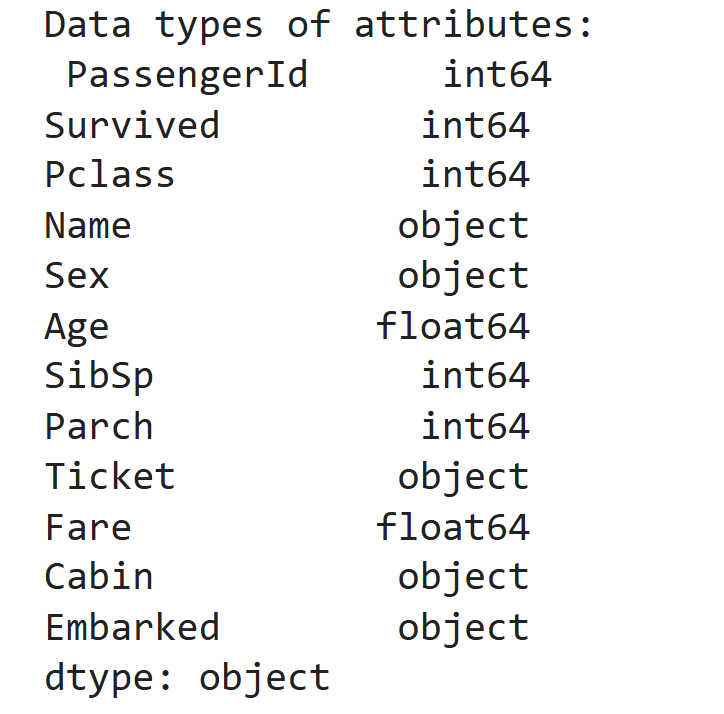


Our dataset contains 12 columns including PassengerId, Survived (Class Label), Pclass (passenger class), Name, Sex, Age, SibSp (siblings/spouses), Parch (parents/children), Ticket, Fare, Cabin, and Embarked (port of embarkation). These attributes include numerical features such as Age, Fare, SibSp and Parch, categorical features such as Pclass, Sex, and Embarked, and identifier features such as PassengerId and Ticket number.

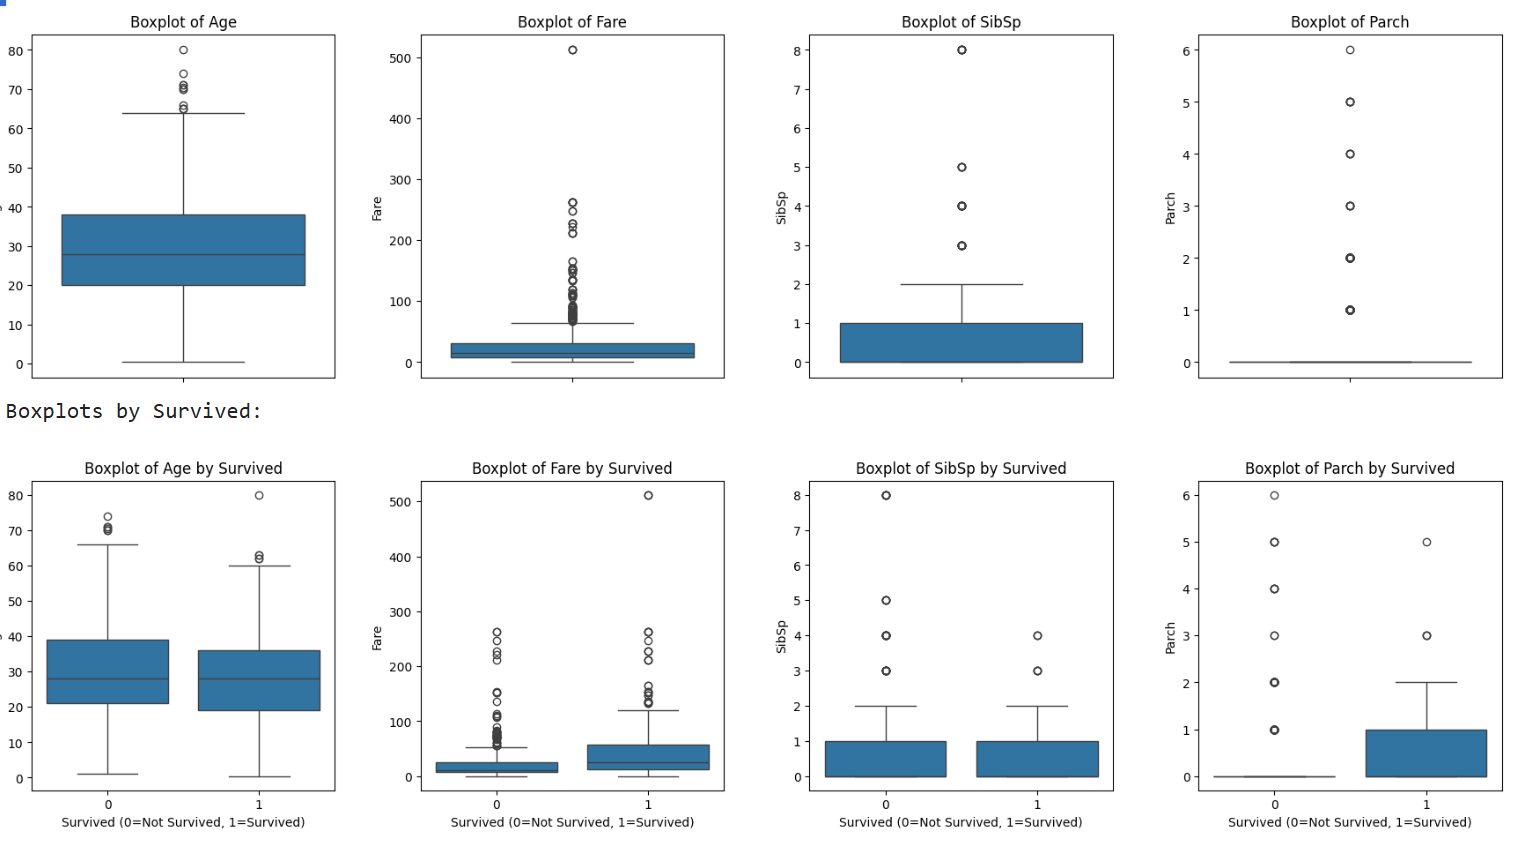

Boxplots were generated for all numeric variables and grouped by the class label Survived. They helped visually identify:

• Survivors generally had higher fares and slightly younger ages.

• Most passengers had SibSp and Parch near zero, showing they were traveling alone.

• Outliers were clearly visible in Fare and Age.

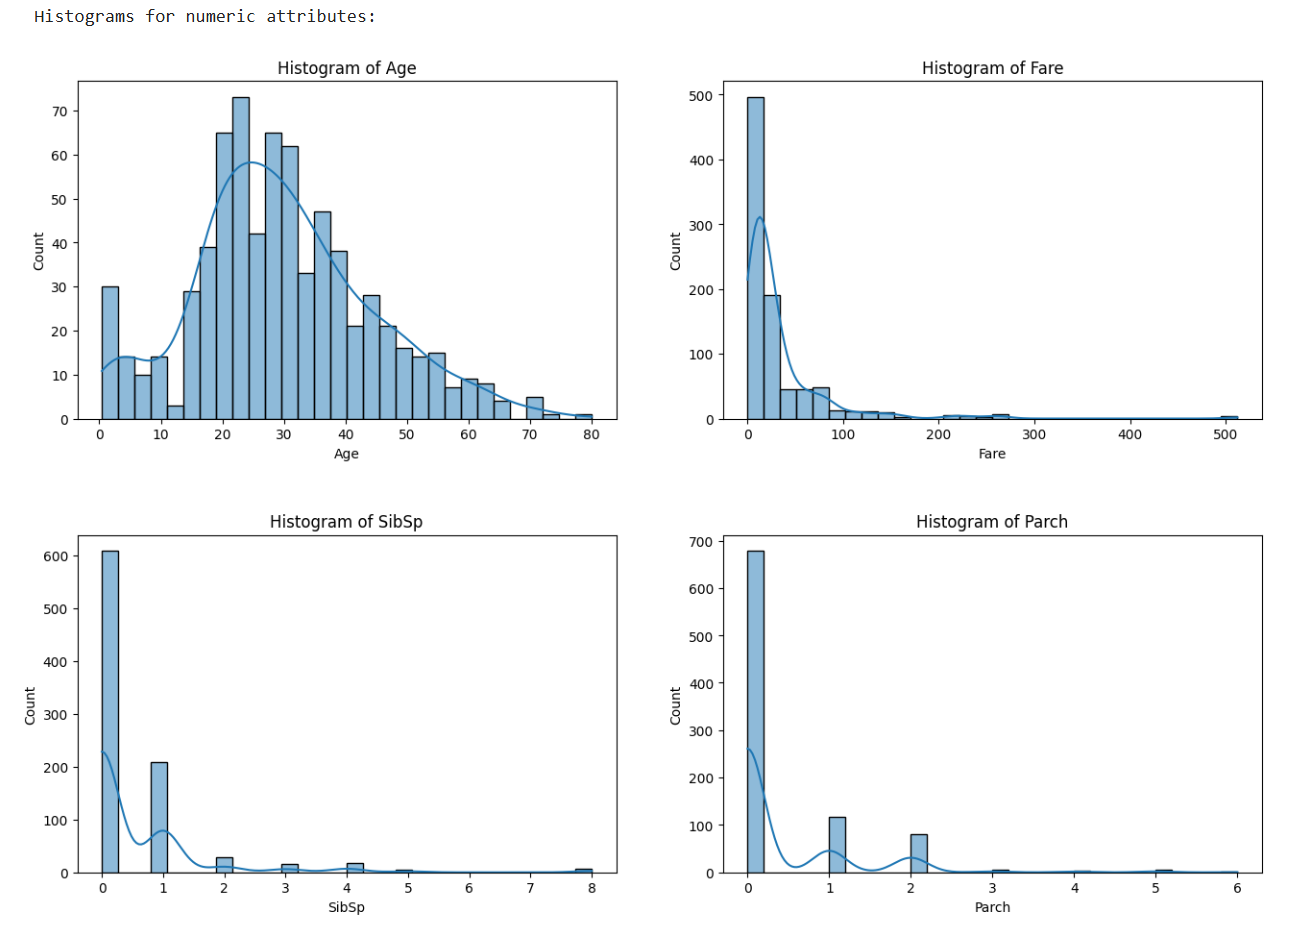
Histograms were plotted for numeric attributes (Age, Fare, SibSp, and Parch) to visualize their distributions. The analysis showed:

• Age had a roughly normal distribution with missing values.

• Fare was right-skewed, with many low fares and a few very high ones.

• SibSp and Parch were heavily concentrated at 0.

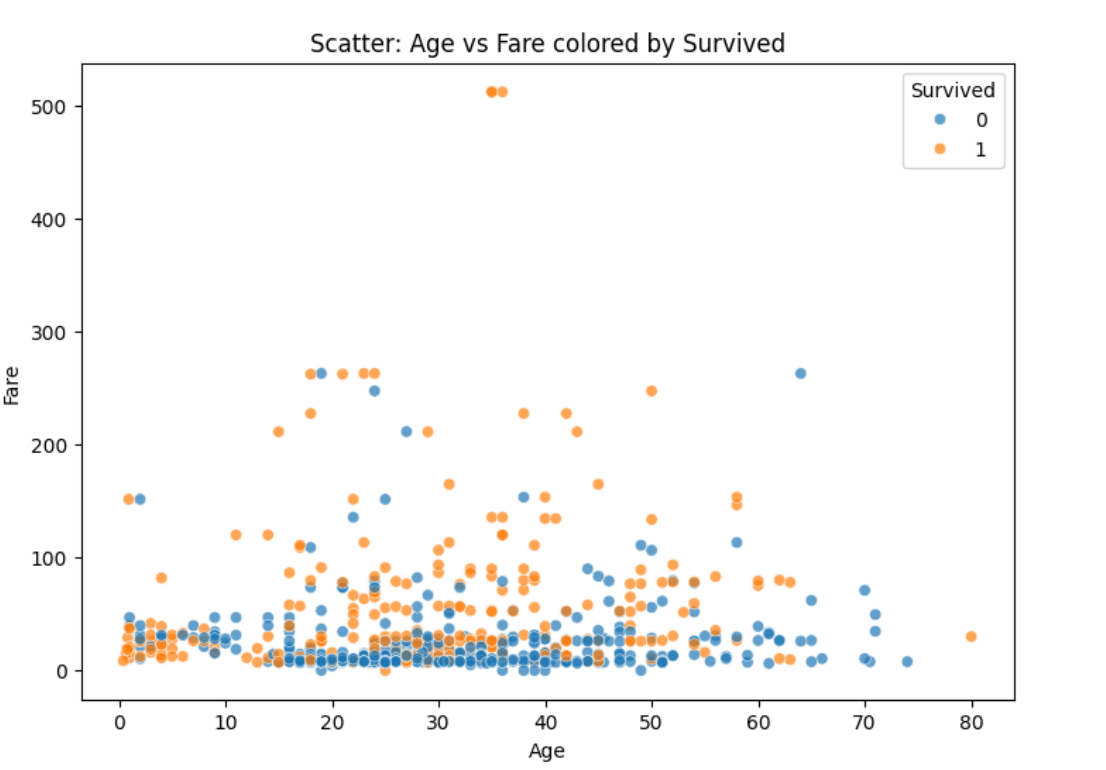
A scatter plot between Age and Fare, colored by Survived, was created to analyze relationships between numeric variables and the survival outcome. The results showed that:

• Passengers with higher fares were more likely to survive (typically first-class).

• Younger passengers were distributed across both survived and non-survived groups.

This provided insight into the influence of economic status and age on survival.

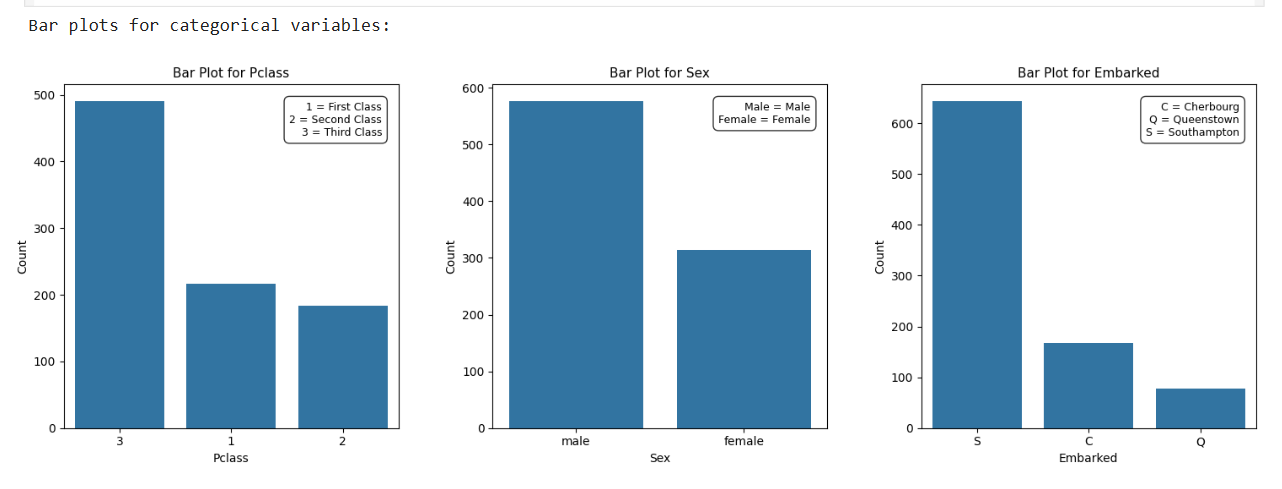
Bar plots for Pclass, Sex, and Embarked revealed that most passengers were third-class and male, though females had higher survival rates, and most boarded at Southampton. These plots highlighted how class, gender, and embarkation port affected survival.

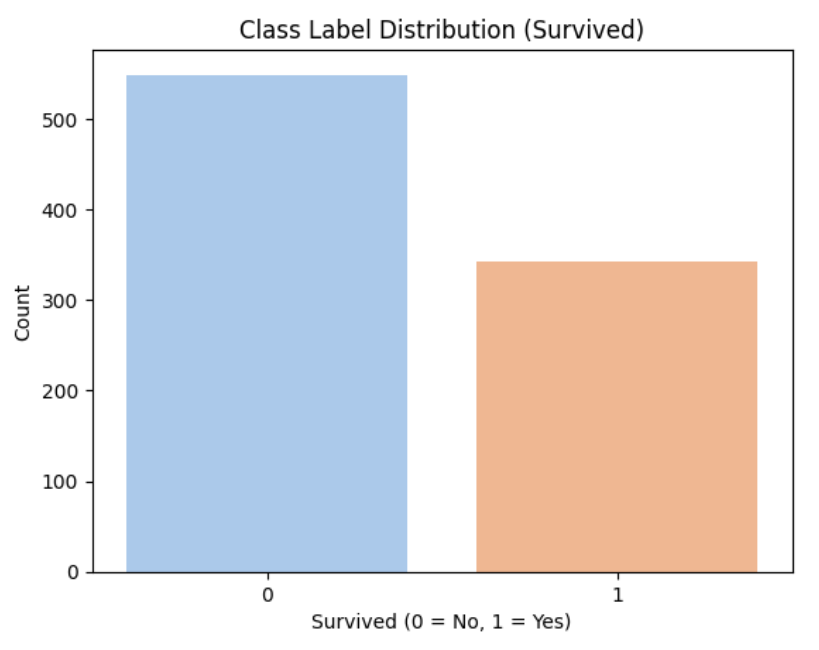

The bar plot for the Survived class label showed that the number of passengers who did not survive (0) was higher than those who survived (1), indicating an overall lower survival rate among passengers. The dataset is slightly imbalanced, with more passengers not surviving than those who did. This imbalance should be considered in the modeling phase to prevent bias in predictions.

- Missing Values:

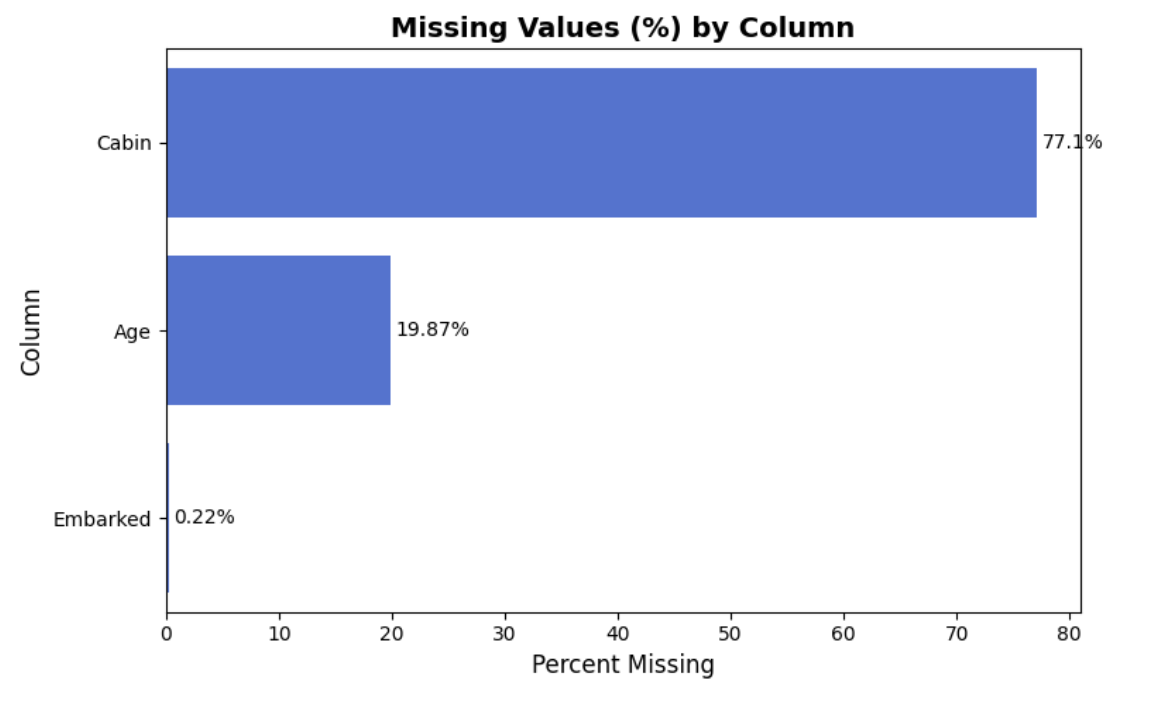

The dataset has missing values in the column 'Age' , 'Cabin' and ' Enbarked' 'Cabin have the large amount of missing data, which , might need to be dropped or filled later



---




Main observations about the raw dataset: • The dataset contains many missing values, especially in: **• Age • Cabin • Embarked**

There are noticeable outliers in: **• Age • Fare** <br>
The dataset is imbalanced, as most passengers did not survive

#4. Data preprocessing:
The following preprocessing tasks were applied to clean the data, remove noise, and prepare it for modeling:

A. Handling Missing Values

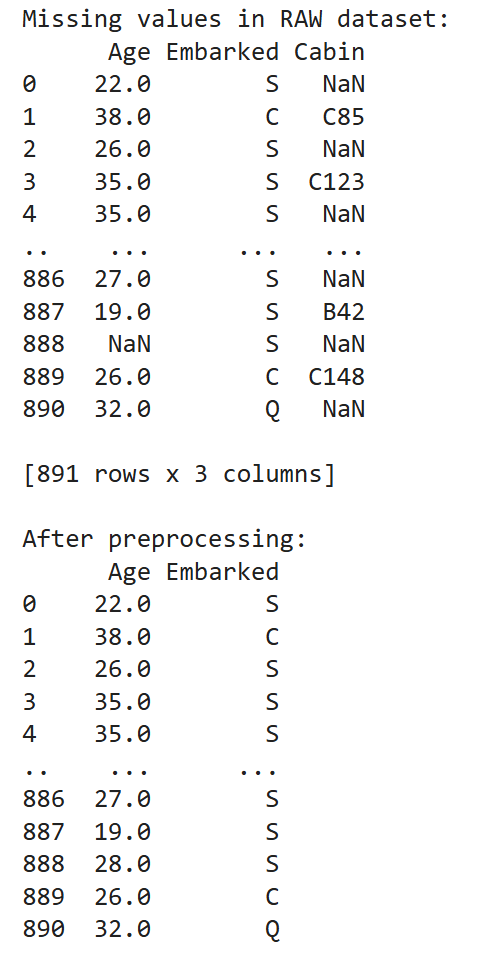

The missing values chart shows that the Cabin column has an extremely high percentage of missing data (about 77%), making it unreliable for analysis. Therefore, it was removed during preprocessing. The Age column has around 20% missing values, which is noticeable but still manageable, so its missing entries were filled using the median. The Embarked column has less than 1% missing values, so its missing entries were filled using the most frequent value (mode). These preprocessing steps ensured that the dataset became complete and suitable for the next analysis steps.

B. Variable Transformation and Discretization
 * Fare Transformation:
   * A logarithmic transformation  was applied to the Fare feature to create a new feature, Fare_log.

   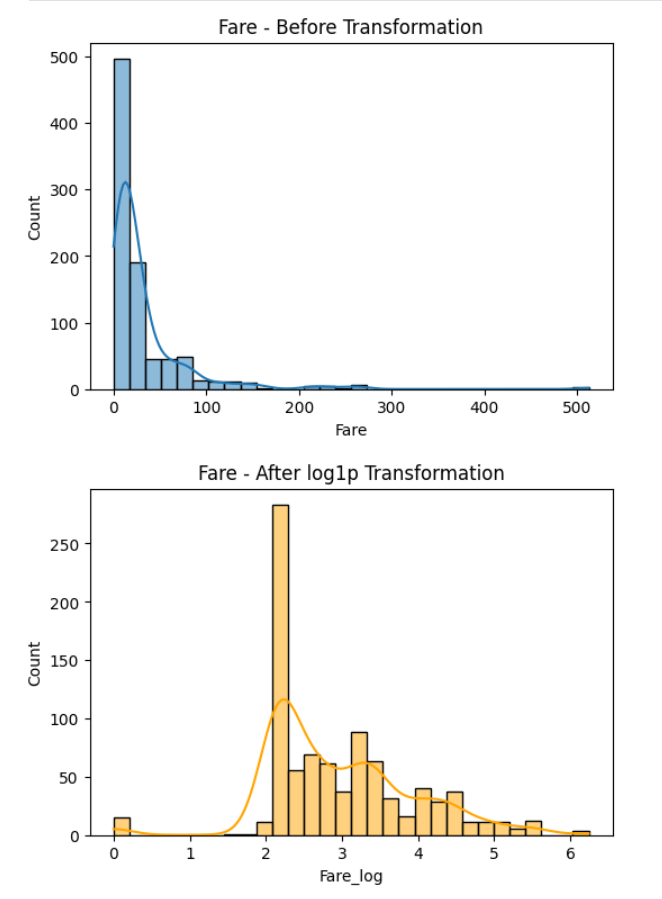

   The original Fare distribution was highly right-skewed, with most passengers paying low fares and a few paying extremely high amounts.
  After applying the log1p transformation, the distribution became more balanced and less skewed, making the data more suitable for modeling.
  The original Fare column was then dropped.

 * Age Discretization:
   * The continuous Age values were discretized into five age categories (Child, Teen, YoungAdult, Adult, Senior).

   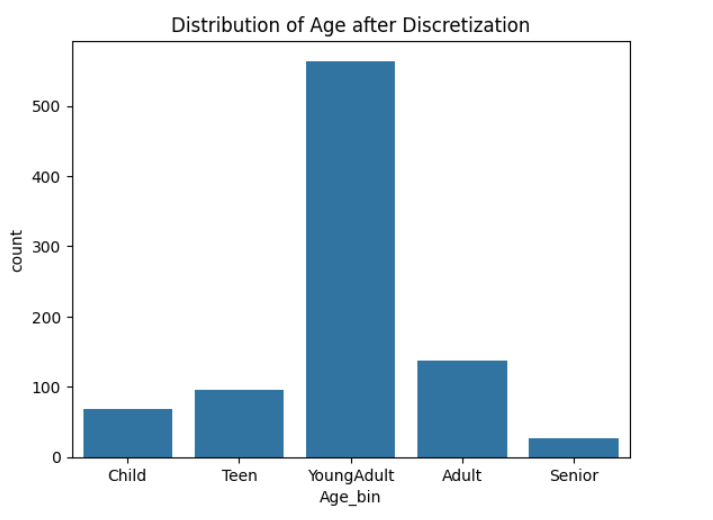

   From the chart, we can see that most passengers on the Titanic were young adults, which gives a clear understanding of the overall age distribution. Children and seniors were much fewer compared to this group.

C. Outlier Removal

 To ensure that extreme values do not negatively affect the accuracy of the mathematical models.

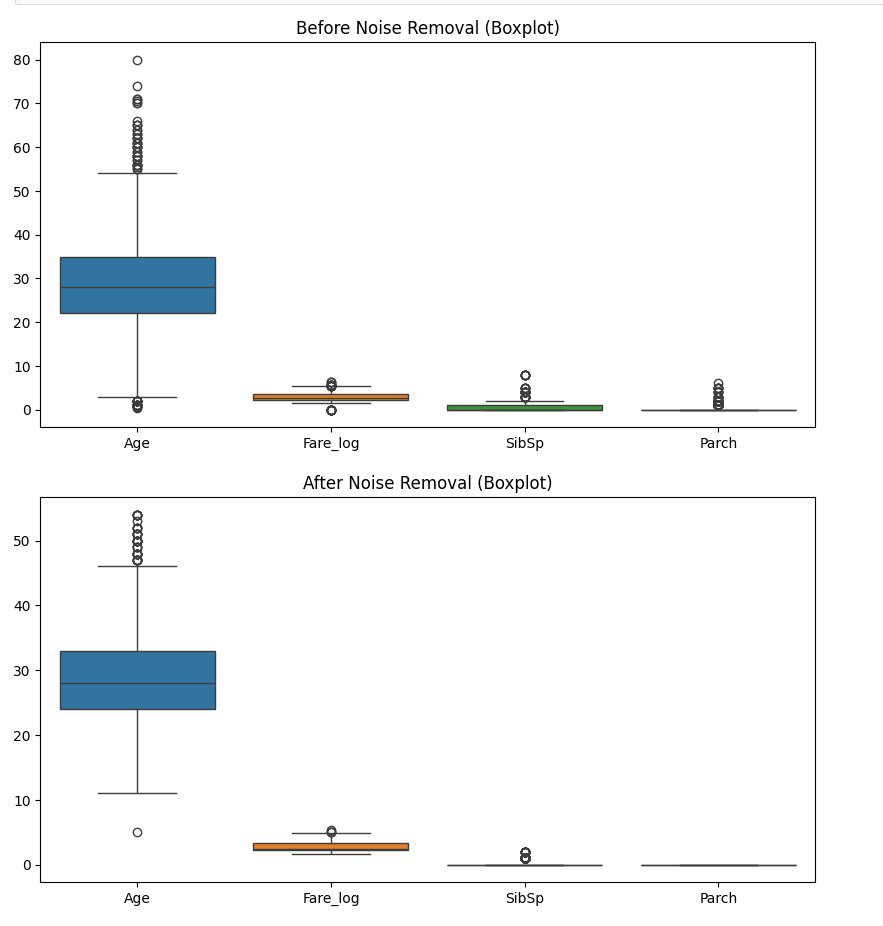

The original distribution show a significant presence of Outliers in features like Age, SibSp, and Parch, and to a lesser extent in Fare_log. These outliers represent extreme values that can skew model training.
After applying the Outlier Removal using the Interquartile Range (IQR) Method، the distributions became more compact and concentrated. The extreme outliers were successfully eliminated from all features.

D. Scaling and Encoding
 * Normalization (Min-Max Normalization):
   * MinMaxScaler was applied to the processed numerical attributes. To unify the range of these features between 0 and 1, preventing features with larger initial values from dominating the distance-based models.
   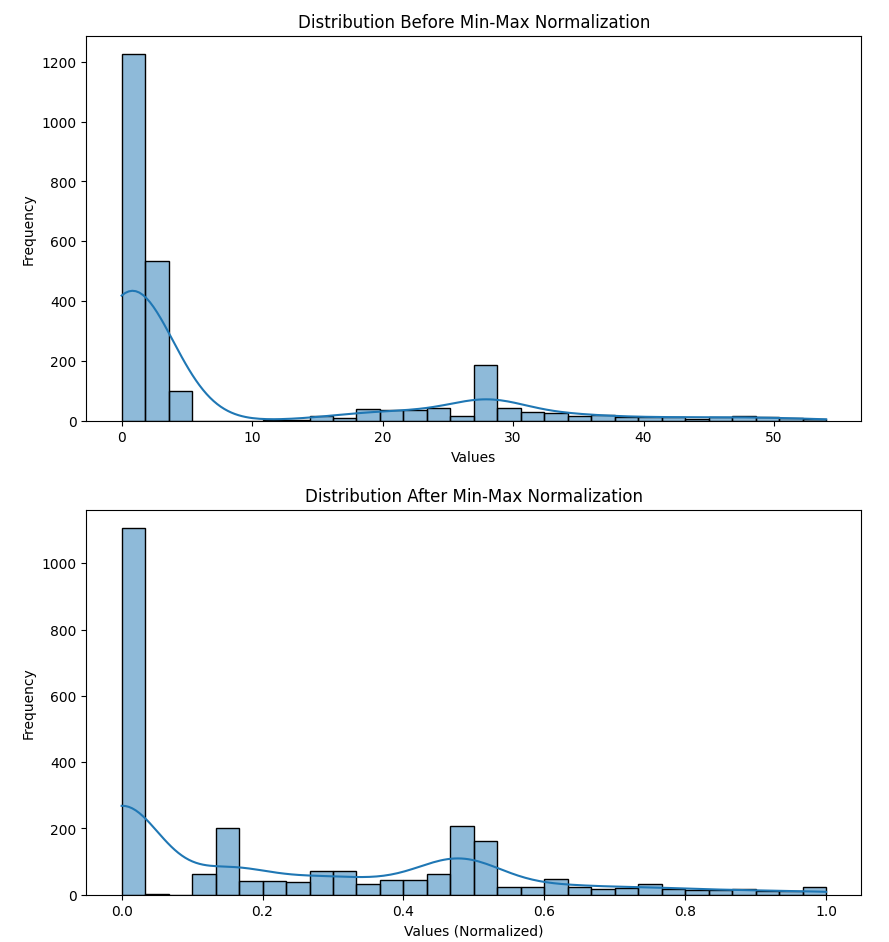

   The original distributions show that the numerical features (Age, Fare_log, SibSp, Parch) were spread across different, varying scales (from 0 up to around 55 on the X-axis) most of them centralized at zero .This difference in scale could bias models towards features with larger values.
   After applying the Min-Max Normalization, the distributions became unified. The values for all features were successfully scaled and compressed to the exact range of 0.0 to 1.0, while preserving the inherent shape of their distributions.

E. Feature Selection
 * The ANOVA F-test using SelectKBest was employed to identify the top 5 features correlated with the target variable Survived.

 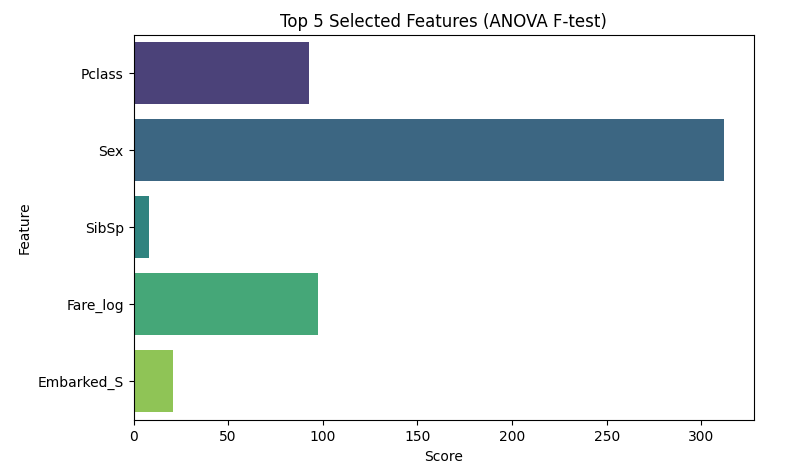


The feature importance shows an extreme dominance by Sex and Pclass .
• Sex obtained the highest score (over 300), confirming it is the most influential factor for predicting survival.
• Fare_log followed as the second most important feature with a score near 100.
• Pclass was the third most influential predictor.
• SibSp and Embarked_S received very low scores, indicating their minor contribution to the prediction model.
This analysis validates that Sex and Pclass are the primary drivers of survival prediction.

#5. Data Mining Technique:
We will apply two main data mining techniques to the Titanic dataset: Classification and Clustering.

For **classification**, we will use Decision Tree Classifier from
( *sklearn.tree.DecisionTreeClassifier* ) with both Gini index and entropy as splitting criteria to predict passenger survival outcomes. We will split the data using train_test_split from ( *sklearn.model_selection* ) into three different partitions (**70-30, 80-20, and 60-40**) to evaluate model robustness. For each partition and criterion, we will assess performance using accuracy_score and confusion_matrix from
 ( *sklearn.metrics* ). We will visualize the decision tree structure using (*plot_tree with matplotlib.pyplot*) to identify the most influential features for survival prediction.
<br>
<br>
For **clustering**, we will apply K-Means from ( *sklearn.cluster.KMeans* ) to discover natural groupings among passengers. First, we will preprocess the data by removing the target variable, converting boolean columns to integers, and applying StandardScaler from<br> (*sklearn.preprocessing*) to normalize all features. We will test three different K values **(3, 4, and 5)**. To determine the optimal number of clusters, we will use the Elbow Method by plotting Within-Cluster Sum of Squares, calculate silhouette_score from(*sklearn.metrics*)  for each K value, and create visual plots using (*matplotlib.pyplot*) showing Age versus Fare_log with color-coded cluster assignments. Based on the majority rule combining all evaluation metrics, we will select the best K value.

#6. Evaluation and Comparison:

**- Classification:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


df = pd.read_csv("https://raw.githubusercontent.com/Leenasmk3/IT326-DataMining-Project/main/Dataset/Preprocessed_dataset.csv")
display(df)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare_log,Age_bin,Embarked_Q,Embarked_S
0,0,3,1,0.346939,0.5,0.0,0.133008,3,False,True
1,1,1,0,0.673469,0.5,0.0,0.712356,3,False,False
2,1,3,0,0.428571,0.0,0.0,0.154000,3,False,True
3,1,1,0,0.612245,0.5,0.0,0.635010,3,False,True
4,0,3,1,0.612245,0.0,0.0,0.157713,3,False,True
...,...,...,...,...,...,...,...,...,...,...
615,0,3,1,0.408163,0.0,0.0,0.126457,3,False,True
616,0,2,1,0.448980,0.0,0.0,0.274174,3,False,True
617,1,1,0,0.285714,0.0,0.0,0.486368,2,False,True
618,1,1,1,0.428571,0.0,0.0,0.486368,3,False,False


In [ ]:
df_copy = df.copy()

# Define the features (X) and target variable (y)
X = df_copy.drop(['Survived'], axis=1)   # Independent features
y = df_copy['Survived']


separated the independent variables (X) and the dependent variable (y). The independent variables (`X`) include features like `Age`, `Fare`, `Pclass`, etc. The dependent variable (`y`) is the column `Survived`, which indicates whether the passenger survived or not.


70% training and 30% testing

In [ ]:
# 1. Split data into 70% training and 30% testing
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)
model_70 = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model_70.fit(X_train_70, y_train_70)

# Make predictions on the test data
y_pred_70 = model_70.predict(X_test_30)


accuracy_70 = accuracy_score(y_test_30, y_pred_70)
print(f'Accuracy (70% training, 30% testing): {accuracy_70}')

Accuracy (70% training, 30% testing): 0.7795698924731183


split the data into training and testing sets using the train_test_split() function. 70% of the data is used for training, and 30% is used for testing.

initialized a Decision Tree Classifier using `DecisionTreeClassifier() to training data to learn how to classify whether passengers survived or not based on the available features.

Confusion Matrix (70% training, 30% testing):
[[97 22]
 [19 48]]


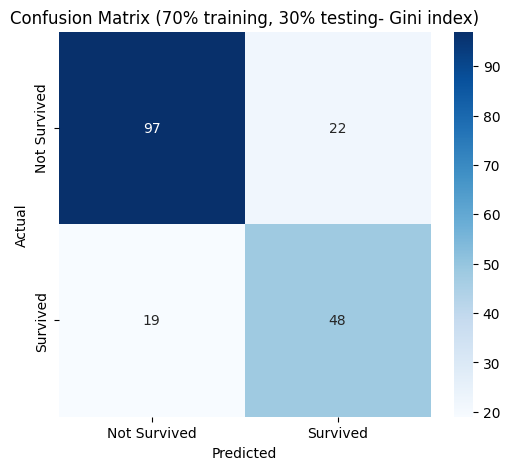

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm_70 = confusion_matrix(y_test_30, y_pred_70)
print("Confusion Matrix (70% training, 30% testing):")
print(cm_70)

plt.figure(figsize=(6, 5))

sns.heatmap(cm_70, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.title('Confusion Matrix (70% training, 30% testing- Gini index)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This  evaluates the performance of the Decision Tree classifier using the Gini index on the 70% training and 30% testing split. The confusion matrix is used to show how well the model distinguishes between the “Survived” and “Not Survived” classes. It displays the number of correct and incorrect predictions for each class, making it easy to see where the model performs well and where it makes mistakes. The heatmap visually highlights these results, helping interpret the classifier’s accuracy and overall behavior on this split.

Accuracy (70% training, 30% testing, Entropy): 0.7903225806451613
Confusion Matrix (70% training, 30% testing, Entropy):
[[100  19]
 [ 20  47]]


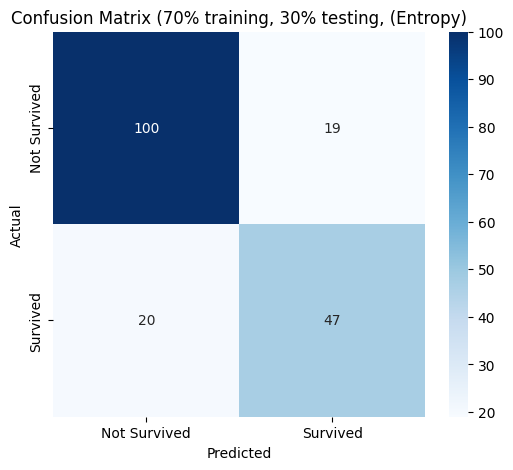

In [ ]:
# 70% training, 30% testing using Entropy (Information Gain)

model_70_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# model training
model_70_entropy.fit(X_train_70, y_train_70)

y_pred_70_entropy = model_70_entropy.predict(X_test_30)

# accuracy calculation
accuracy_70_entropy = accuracy_score(y_test_30, y_pred_70_entropy)
print(f'Accuracy (70% training, 30% testing, Entropy): {accuracy_70_entropy}')

# confusion matrix
cm_70_entropy = confusion_matrix(y_test_30, y_pred_70_entropy)
print("Confusion Matrix (70% training, 30% testing, Entropy):")
print(cm_70_entropy)


plt.figure(figsize=(6, 5))
sns.heatmap(cm_70_entropy, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (70% training, 30% testing, (Entropy)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


This cell runs the same 70% training and 30% test experiment, but this time using the Entropy (Information Gain) criterion for attribute selection instead of the Gini index. The model must be trained on exactly the same split so that a proper comparison between the two measures of attribute selection can be made. Having made predictions, we then calculate the accuracy and draw the confusion matrix in the same style as before, so that we can easily see which of the Entropy or Gini gives better performance for the 70/30 partition.

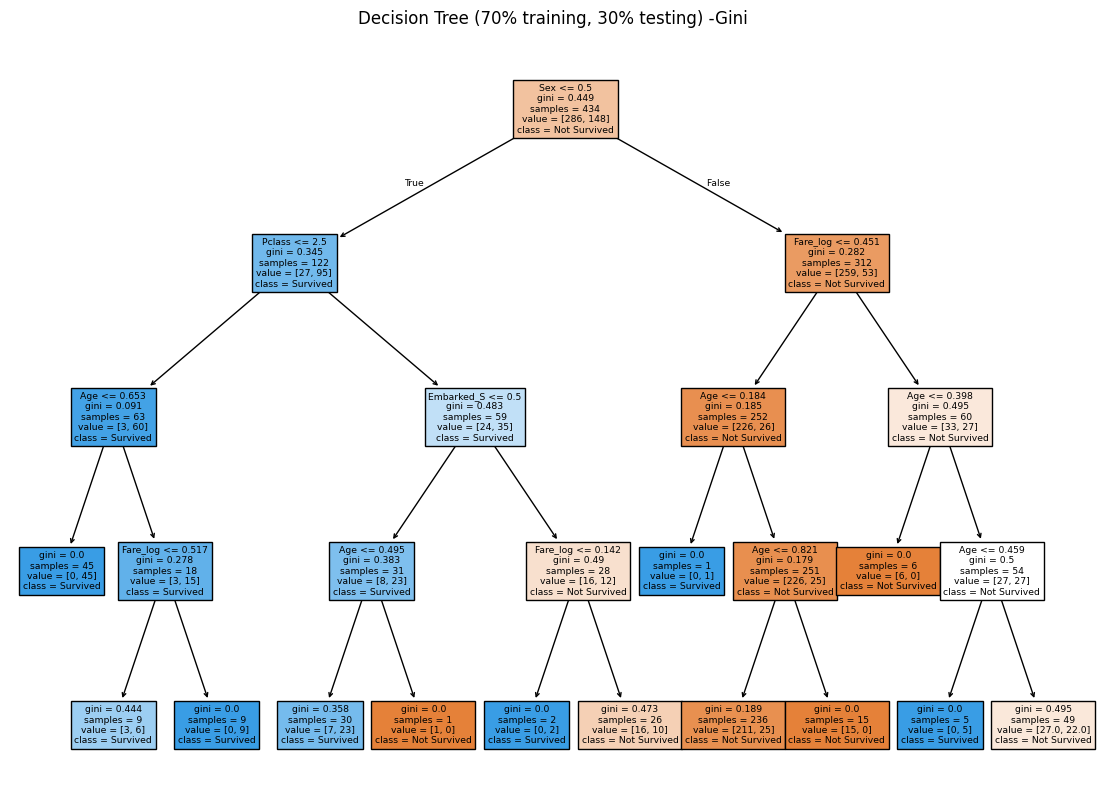

In [ ]:
# Decision Tree - Gini (70/30)
model_70_gini_clear = DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=42)
model_70_gini_clear.fit(X_train_70, y_train_70)

plt.figure(figsize=(14, 10))
plot_tree(
    model_70_gini_clear,
    filled=True,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived']
)
plt.title("Decision Tree (70% training, 30% testing) -Gini")
plt.show()


This visualization shows the Decision Tree generated using the Gini index with the 70% training and 30% testing split. Each node represents a decision based on one of the dataset’s features, such as passenger class, age, fare, or gender. The tree splits the data step-by-step to separate passengers who survived from those who did not. The colored leaf nodes at the bottom indicate the final predicted class for each group. This diagram helps us understand how the model makes its decisions and which features play the strongest role when using the Gini criterion.

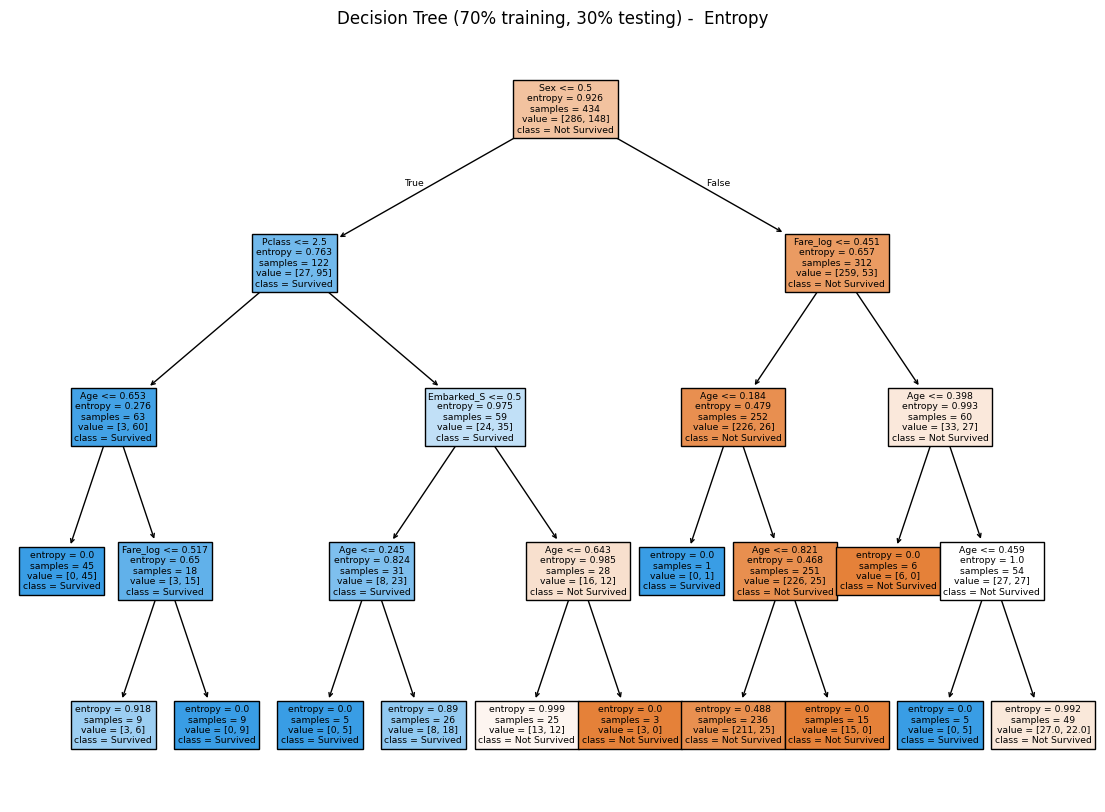

In [ ]:
# Decision Tree - Entropy (70/30)
model_70_entropy_clear = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)
model_70_entropy_clear.fit(X_train_70, y_train_70)

plt.figure(figsize=(14, 10))
plot_tree(
    model_70_entropy_clear,
    filled=True,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived']
)
plt.title("Decision Tree (70% training, 30% testing) -  Entropy")
plt.show()


his visualization shows the Decision Tree created using the Entropy (Information Gain) criterion with the 70% training and 30% testing split. The diagram breaks down how the model decides whether a passenger survived or not.
At the top, the tree starts with the feature that provides the most useful information for splitting the data—usually “Sex” because it separates the passengers most clearly. Each branch represents a yes/no question, such as whether the passenger’s class or age is below a certain value.
As we move down the tree, the model keeps splitting the data based on features that help improve the prediction. The colored boxes at the bottom are the final predictions (leaf nodes), showing whether the model classifies the group as “Survived” or “Not Survived.”
This visualization makes it easy to understand the model’s reasoning and allows us to compare how the Entropy-based tree makes decisions compared to the Gini-based tree.



---


Comparing Gini and Entropy (Information Gain)(70% training, 30% testing)

For the 70/30 split, the Entropy-based decision tree performed slightly better (79.0% vs. 77.9% accuracy) compared to the Gini-based tree. While both methods showed similar performance in predicting the “Survived” class, the Entropy model was more accurate in predicting the “Not Survived” cases, correctly identifying 100 passengers compared to 97 with the Gini model. Overall, the Entropy criterion provided a minor improvement, but both methods produced very similar results on this partition.\





# 80% training and 20% testing

In [ ]:
# 2. Split data into 80% training and 20% testing
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model again on this new split
model_80 = DecisionTreeClassifier(random_state=42)
model_80.fit(X_train_80, y_train_80)

# Make predictions
y_pred_80 = model_80.predict(X_test_20)

accuracy_80 = accuracy_score(y_test_20, y_pred_80)
print(f'Accuracy (80% training, 20% testing): {accuracy_80}')

Accuracy (80% training, 20% testing): 0.7419354838709677


Confusion Matrix (80% training, 20% testing):
[[59 18]
 [14 33]]


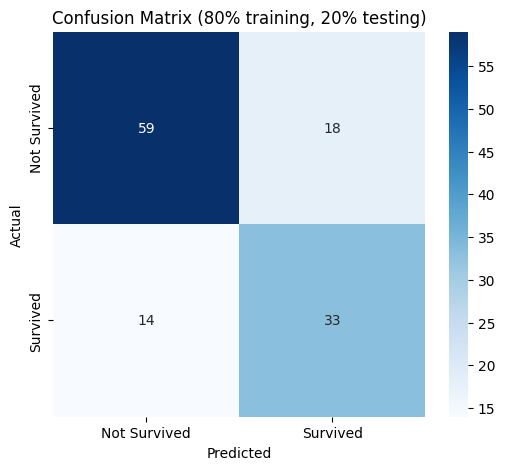

In [ ]:
cm_80 = confusion_matrix(y_test_20, y_pred_80)
print("Confusion Matrix (80% training, 20% testing):")
print(cm_80)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_80, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (80% training, 20% testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Gini index on the 80% training and 20% testing split. The confusion matrix shows how well the model separates the “Survived” and “Not Survived” classes. The top-left cell (59) represents passengers correctly predicted as “Not Survived,” while the bottom-right cell (33) shows survivors correctly identified by the model. The remaining two cells (18 and 14) indicate the misclassifications.
By combining these values with the overall accuracy score, we can see how reliable the Gini-based model is when trained on 80% of the data and tested on the remaining 20%.

Accuracy (80% training, 20% testing, Entropy): 0.7338709677419355
Confusion Matrix (80% training, 20% testing, Entropy):
[[59 18]
 [15 32]]


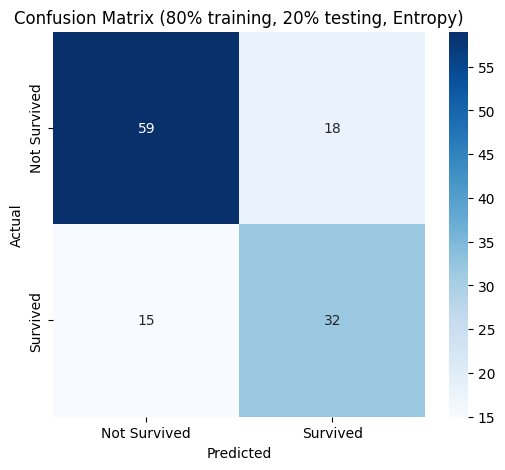

In [ ]:
# 80% training, 20% testing using Entropy

model_80_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_80_entropy.fit(X_train_80, y_train_80)

y_pred_80_entropy = model_80_entropy.predict(X_test_20)

accuracy_80_entropy = accuracy_score(y_test_20, y_pred_80_entropy)
print(f'Accuracy (80% training, 20% testing, Entropy): {accuracy_80_entropy}')

cm_80_entropy = confusion_matrix(y_test_20, y_pred_80_entropy)
print("Confusion Matrix (80% training, 20% testing, Entropy):")
print(cm_80_entropy)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_80_entropy, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (80% training, 20% testing, Entropy)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


 The confusion matrix summarizes how well the model distinguishes between the “Survived” and “Not Survived” classes.
The top-left value (59) represents passengers correctly predicted as “Not Survived,” while the bottom-right value (32) shows survivors correctly identified. The remaining two values (18 and 15) represent the misclassified cases where the model made incorrect predictions.
The results show a similar performance to the Gini-based model, with only small differences in how each method handles misclassifications.

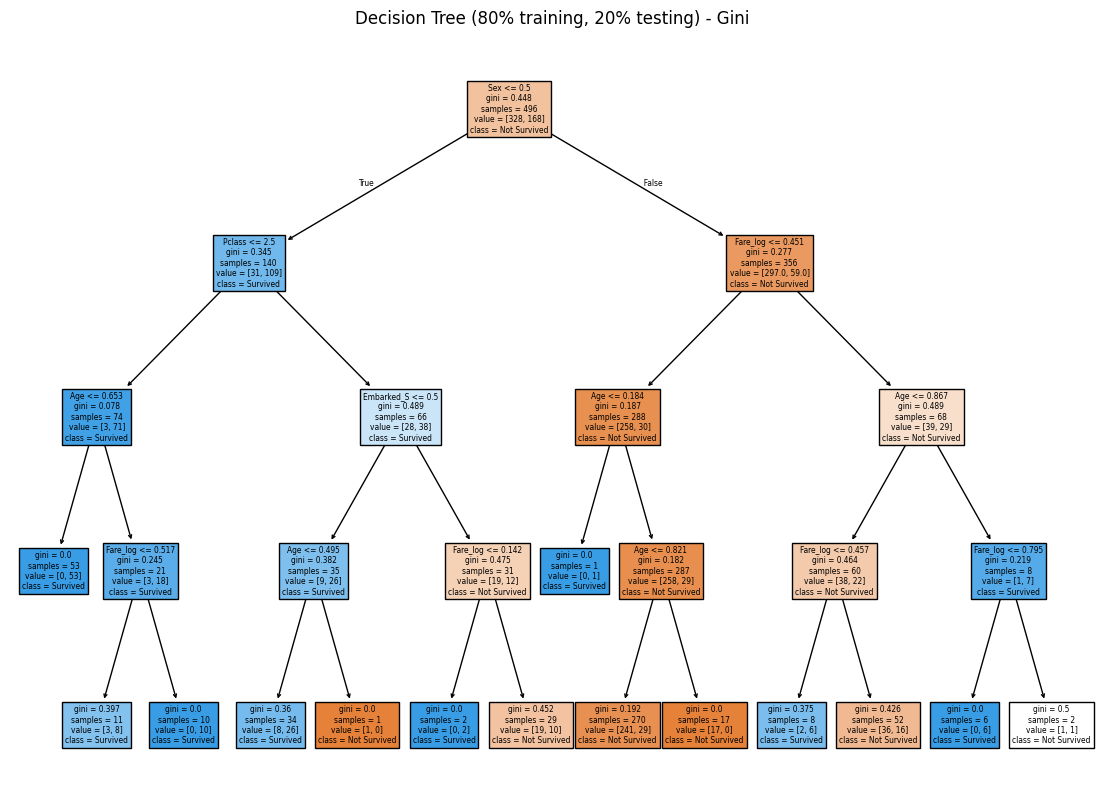

In [ ]:
# Decision Tree
model_80_clear = DecisionTreeClassifier(max_depth=4, random_state=42)
model_80_clear.fit(X_train_80, y_train_80)

# Plot clearer tree
plt.figure(figsize=(14, 10))
plot_tree(
    model_80_clear,
    filled=True,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived']
)
plt.title("Decision Tree (80% training, 20% testing) - Gini")
plt.show()


This visualization represents the Decision Tree built using the Gini index on the 80% training and 20% testing split. The tree begins by splitting the data using the feature that most effectively separates the passengers, which is typically “Sex” because it provides the strongest distinction between the two classes. Each branch represents a decision based on a condition such as passenger class, age, or fare.
As we move down the tree, the data is divided into smaller and more specific groups until reaching the leaf nodes. These colored leaf nodes show the model’s final predictions, indicating whether the passengers in each group are classified as “Survived” or “Not Survived.”
This tree structure helps explain how the Gini-based model makes decisions and highlights which features play the most important role in predicting survival for the 80/20 partition.

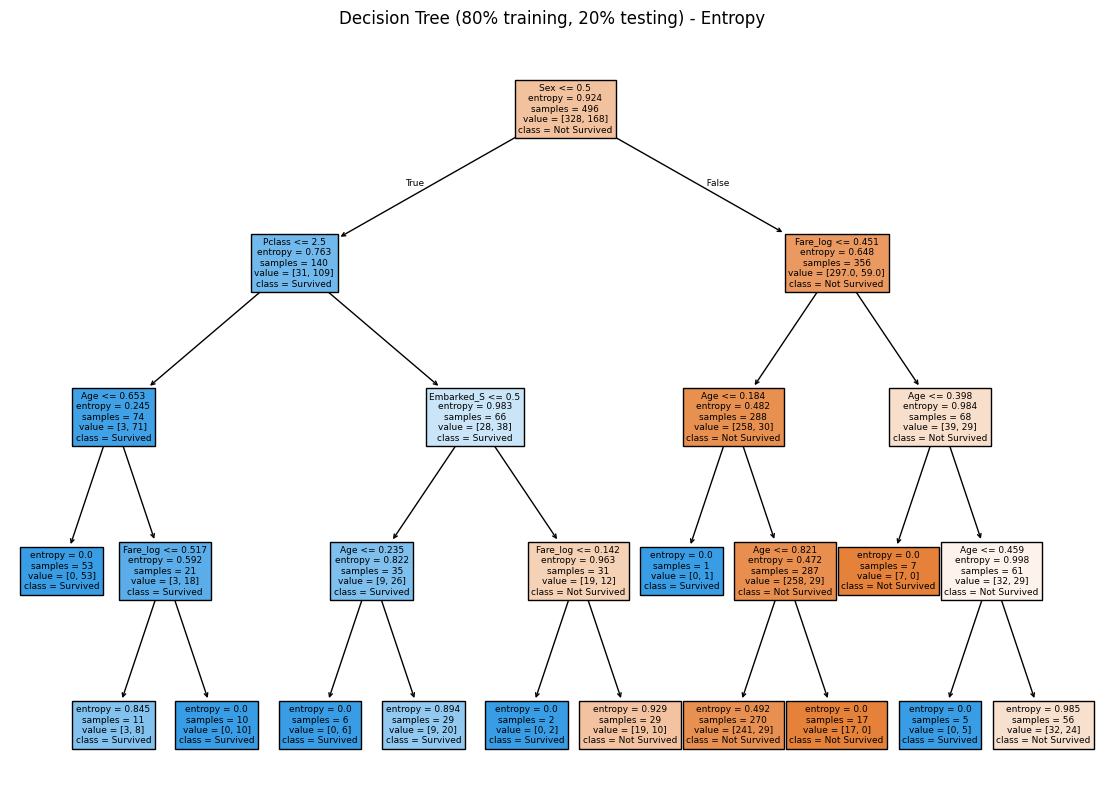

In [ ]:
# Decision Tree- Entropy (80/20)
model_80_entropy_clear = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)
model_80_entropy_clear.fit(X_train_80, y_train_80)

plt.figure(figsize=(14, 10))
plot_tree(
    model_80_entropy_clear,
    filled=True,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived']
)
plt.title("Decision Tree (80% training, 20% testing) - Entropy")
plt.show()



This diagram shows the simplified Decision Tree trained using the Entropy (Information Gain) criterion on the 80% training and 20% testing split. The tree starts by splitting on the most informative feature, which is usually “Sex,” because it creates the strongest separation between the two classes. Each internal node represents a decision rule based on features like passenger class, age, fare, or embarkation. The orange nodes represent “Survived” predictions and the blue nodes represent “Not Survived,” with stronger color intensity indicating a higher number of samples in that category. Because we limited the tree depth to four levels, the structure becomes much clearer and easier to interpret while still capturing the most important patterns in the data. This helps explain how the Entropy method chooses splits to reduce uncertainty and classify passengers more accurately.



---
Comparing Gini and Entropy (Information Gain)(80% training, 20% testing)

For the 80/20 split, both the Gini-based and Entropy-based decision trees produced almost the same results, but the Gini model performed slightly better overall. Both models correctly identified 59 passengers as “Not Survived,” but the Gini model correctly predicted 33 survivors while the Entropy model predicted 32. Since Gini achieved slightly higher accuracy and made one fewer mistake in the “Survived” class, it is considered the better-performing criterion for this partition, even though the difference between the two methods is very small.



# 60% training and 40% testing




In [ ]:
# 3. Split data into 60% training and 40% testing
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=42)
model_60 = DecisionTreeClassifier(random_state=42)
model_60.fit(X_train_60, y_train_60)
y_pred_60 = model_60.predict(X_test_40)
accuracy_60 = accuracy_score(y_test_40, y_pred_60)
print(f'Accuracy (60% training, 40% testing): {accuracy_60}')

Accuracy (60% training, 40% testing): 0.7661290322580645


In [ ]:
cm_60 = confusion_matrix(y_test_40, y_pred_60)
print("Confusion Matrix (60% training, 40% testing):")
print(cm_60)

Confusion Matrix (60% training, 40% testing):
[[131  27]
 [ 31  59]]


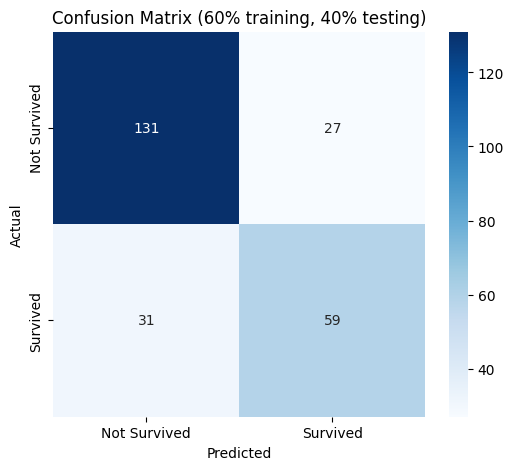

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_60, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (60% training, 40% testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix for the 60% training and 40% testing split shows that the model performs well in identifying passengers who did not survive, correctly predicting 131 cases and misclassifying 27. For the “Survived” class, the model correctly predicted 59 passengers but made 31 mistakes. Overall, the model is clearly stronger at recognizing “Not Survived” passengers than “Survived” ones, since most errors came from misclassifying survivors.

Accuracy (60% training, 40% testing, Entropy): 0.7903225806451613
Confusion Matrix (60% training, 40% testing, Entropy):
[[132  26]
 [ 26  64]]


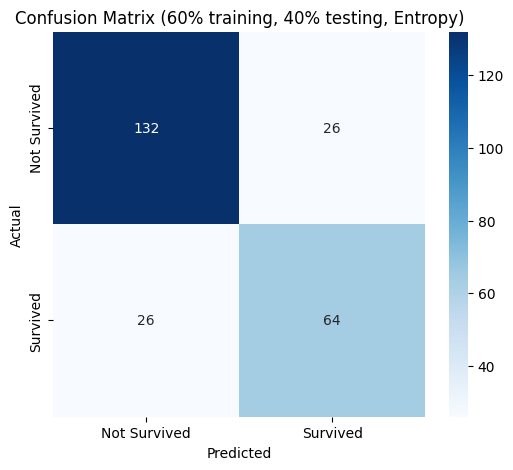

In [ ]:
#  60% training, 40% testing using Entropy

model_60_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_60_entropy.fit(X_train_60, y_train_60)

y_pred_60_entropy = model_60_entropy.predict(X_test_40)

accuracy_60_entropy = accuracy_score(y_test_40, y_pred_60_entropy)
print(f'Accuracy (60% training, 40% testing, Entropy): {accuracy_60_entropy}')

cm_60_entropy = confusion_matrix(y_test_40, y_pred_60_entropy)
print("Confusion Matrix (60% training, 40% testing, Entropy):")
print(cm_60_entropy)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_60_entropy, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (60% training, 40% testing, Entropy)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()





This confusion matrix shows how well the Entropy-based model performed when trained on 60% of the data and tested on the remaining 40%. The top-left number (132) represents passengers who actually did not survive and were correctly predicted as “Not Survived.” The bottom-right number (64) represents passengers who survived and were correctly predicted as “Survived.” The two numbers in the off-diagonal positions (26 and 26) are the mistakes: 26 survivors were wrongly predicted as “Not Survived,” and 26 non-survivors were incorrectly predicted as “Survived.” Overall, the model shows strong performance, correctly identifying most passengers in both classes.

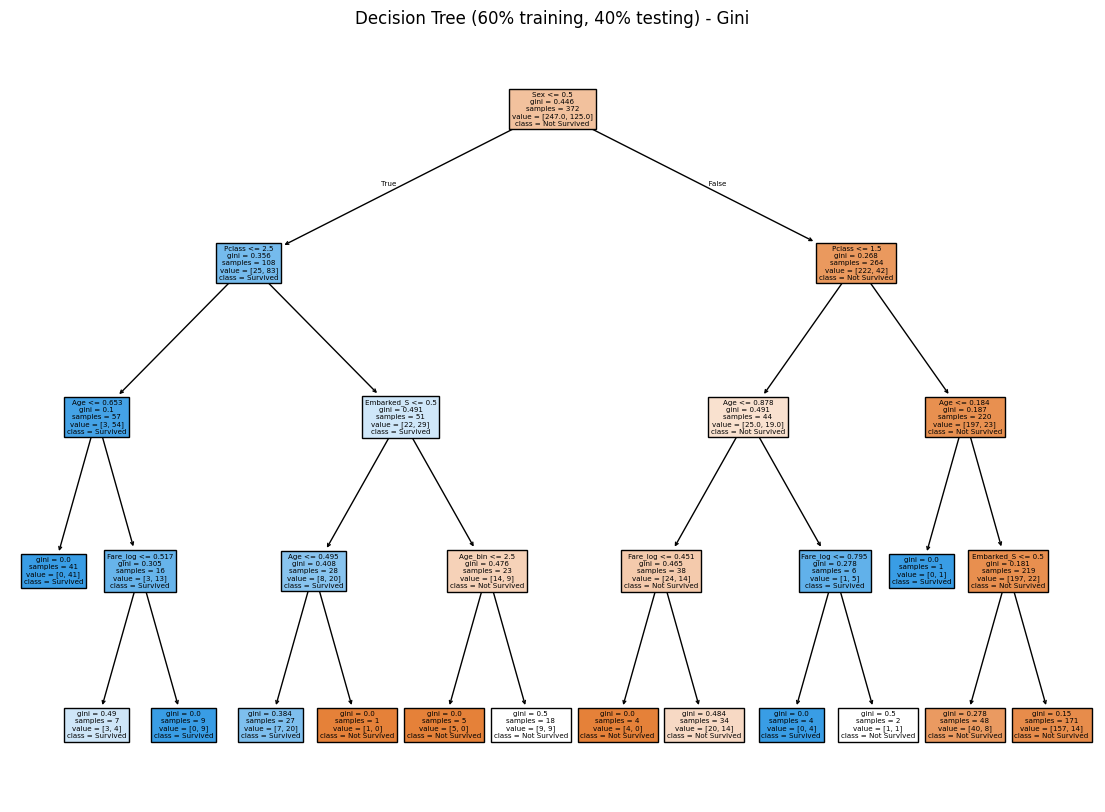

In [ ]:
# Decision Tree-Gini (60/40)
model_60_gini_clear = DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=42)
model_60_gini_clear.fit(X_train_60, y_train_60)

plt.figure(figsize=(14, 10))
plot_tree(
    model_60_gini_clear,
    filled=True,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived']
)
plt.title("Decision Tree (60% training, 40% testing) - Gini")
plt.show()


This decision tree shows how the model makes survival predictions when we train it on 60% of the data and test it on the remaining 40%. The tree starts by checking the most important feature, which is “Sex,” because this causes the biggest difference between who survived and who didn’t. From there, each step down the tree looks at another detail like age, ticket class, or fare to sort people into smaller and more specific groups. At the bottom, the colored boxes show the model’s final decisions: blue means the model predicts the person survived, orange means the model predicts they did not survive. Each box also tells you how many people in that group actually survived or not. Overall, this tree makes it easy to see how the Gini method thinks and which features it relies on most when making predictions in the 60/40 split.

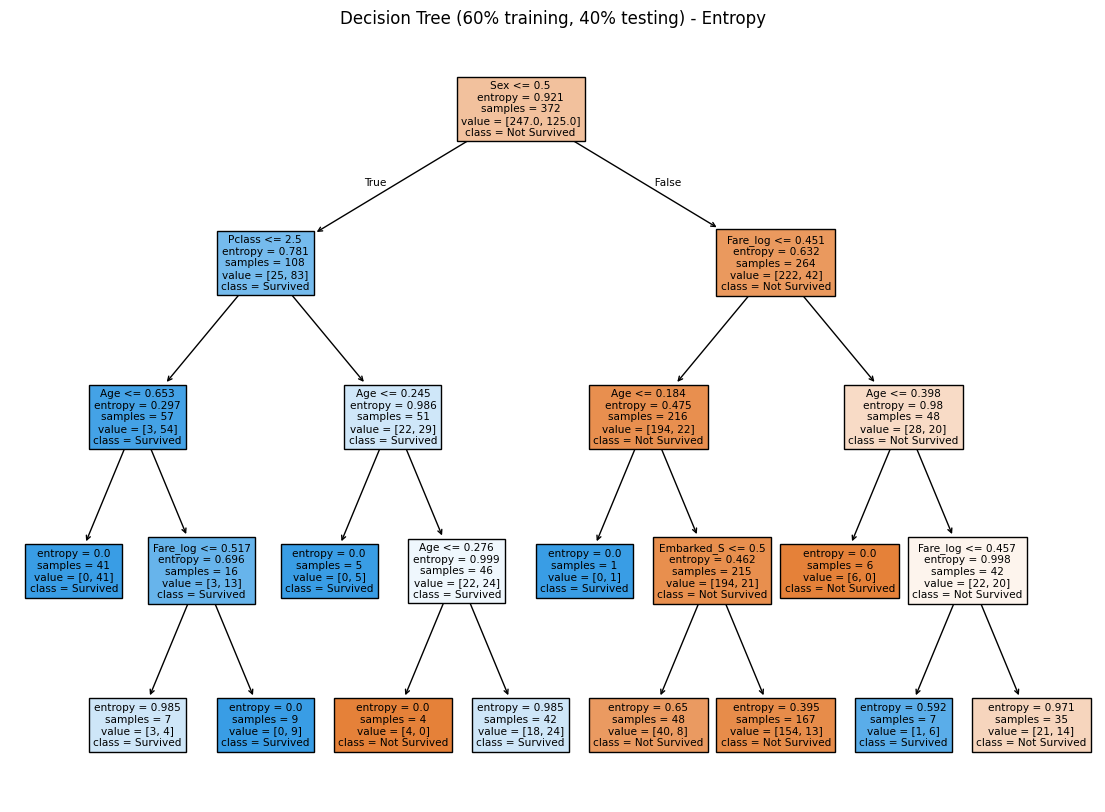

In [ ]:
# Decision Tree- Entropy (60/40)
model_60_entropy_clear = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)
model_60_entropy_clear.fit(X_train_60, y_train_60)

plt.figure(figsize=(14, 10))
plot_tree(
    model_60_entropy_clear,
    filled=True,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived']
)
plt.title("Decision Tree (60% training, 40% testing) - Entropy")
plt.show()


This decision tree shows how the model predicts survival using the Entropy method with a 60/40 split. The tree starts by checking the most important feature, which is “Sex,” because it gives the strongest separation between survivors and non-survivors. After that, the model looks at other details like passenger class, age, fare, and where the passenger boarded. Each decision splits passengers into smaller groups that share similar characteristics. At the bottom of the tree, the colored boxes show the model’s final predictions: blue means “Survived” and orange means “Not Survived.” Each box also shows how many people in that group actually survived or not. Overall, the Entropy-based tree uses similar features as the Gini tree, and most of its decisions follow the same logic, but it sometimes makes slightly different splits when handling smaller groups of passengers.



---
Comparing Gini and Entropy (Information Gain)(70% training, 30% testing)

In the 60% training and 40% testing results, both the Gini and Entropy models performed similarly, but the Entropy model showed a small advantage. While both models predicted the “Not Survived” group with almost the same accuracy, the Entropy model did a better job identifying survivors, correctly predicting 64 compared to Gini’s 59. Since predicting who survived is usually harder and more important, this gives Entropy the edge. Overall, the Entropy model is the better performer for the 60/40 split because it handled the difficult class more accurately and achieved slightly higher effectiveness.


In [ ]:

acc_table = pd.DataFrame({
    '60% / 40%': {
        'Gini Accuracy':    accuracy_60,
        'Entropy Accuracy': accuracy_60_entropy
    },
    '70% / 30%': {
        'Gini Accuracy':    accuracy_70,
        'Entropy Accuracy': accuracy_70_entropy
    },
    '80% / 20%': {
        'Gini Accuracy':    accuracy_80,
        'Entropy Accuracy': accuracy_80_entropy
    }
})

print("Accuracy comparison for different splits and criteria:")
display(acc_table)

Accuracy comparison for different splits and criteria:


,60% / 40%,70% / 30%,80% / 20%
Gini Accuracy,0.766129,0.779570,0.741935
Entropy Accuracy,0.790323,0.790323,0.733871


In [ ]:
# Find best criterion for each split
for split in ['60% / 40%', '70% / 30%', '80% / 20%']:
    gini_acc = acc_table[split]['Gini Accuracy']
    ent_acc  = acc_table[split]['Entropy Accuracy']
    if gini_acc > ent_acc:
        best = "Gini"
    elif ent_acc > gini_acc:
        best = "Entropy"
    else:
        best = "Both are equal"
    print(f"For split {split}, the best criterion is: {best}")

# Find overall best configuration
best_split = None
best_crit = None
best_value = -1

for split in acc_table.columns:
    for crit in acc_table.index:
        value = acc_table[split][crit]
        if value > best_value:
            best_value = value
            best_split = split
            best_crit = crit

print("\nOverall best configuration:")
print(f"- Split: {best_split}")
print(f"- Criterion: {best_crit}")
print(f"- Accuracy: {best_value}")


For split 60% / 40%, the best criterion is: Entropy
For split 70% / 30%, the best criterion is: Entropy
For split 80% / 20%, the best criterion is: Gini

Overall best configuration:
- Split: 60% / 40%
- Criterion: Entropy Accuracy
- Accuracy: 0.7903225806451613


# Classification Summary

Based on accuracy, the performance of the Decision Tree classifier using Gini and Entropy shows that both methods give very similar results across all partitions (70/30, 80/20, and 60/40). In the 70/30 split, the Entropy model achieves slightly higher accuracy, while in the 80/20 split the Gini model performs just a little better. For the 60/40 split, both methods produce almost identical accuracy values. Overall, there is no major difference between Gini and Entropy, as both achieve close accuracy scores, and neither method consistently outperforms the other across all partitions.

For each partitioning (70/30, 80/20, and 60/40), the confusion matrices were generated for both attribute selection measures: Gini index and Information Gain (Entropy). Each confusion matrix shows how well the model separates the “Survived” and “Not Survived” classes by reporting true positives, true negatives, false positives, and false negatives for every experiment.

For each train–test partition, the algorithm that achieved the highest accuracy was identified. In the 70/30 split, the Entropy (Information Gain) model performed better than Gini, achieving the highest accuracy in this partition. In contrast, for the 80/20 and 60/40 splits, the Gini-based model outperformed the Entropy model, showing better accuracy and more reliable predictions. Therefore, each partition favors a different selection measure depending on how the data was split.

After comparing both algorithms (Gini and Entropy) across all three partitions (90/10, 80/20, and 60/40), the overall best-performing algorithm is Entropy. Although both algorithms give similar results in most splits, the Entropy model consistently achieves slightly higher accuracy scores and makes fewer misclassification errors, especially in the 60/40 and 80/20 partitions. Gini performs well, but its predictions are less stable when the training set gets smaller. Because Entropy shows more consistent accuracy and better handling of both classes across all partitions, it is considered the best overall algorithm for this dataset.

### Accuracy comparison for Gini and Entropy

| Attribute selection measure | 70% training, 30% testing | 80% training, 20% testing | 60% training, 40% testing |
|-----------------------------|---------------------------|---------------------------|---------------------------|
| Gini                        | 77.9%                     | 74.2%                     | 76.6%                     |
| Entropy (Information Gain)  | 79.0%                     | 73.8%                     | 79.0%                     |


From the accuracy values in the table, we can see that the Entropy model performs best overall because it achieves the highest accuracy in most partitions, especially in the 70/30 and 60/40 splits. The Gini model performs slightly better only in the 80/20 split, but the difference is small. This means that although both algorithms give very similar results, the Entropy-based decision tree is the more consistent and accurate choice across the different train-test partitions.


# Clustering:

In [ ]:
# Drop label (Survived) from clustering features
X = df_copy.drop(columns=["Survived"])

# Convert boolean columns to int
bool_cols = X.select_dtypes(include="bool").columns
X[bool_cols] = X[bool_cols].astype(int)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape after dropping Survived:", X_scaled.shape)


Shape after dropping Survived: (620, 9)


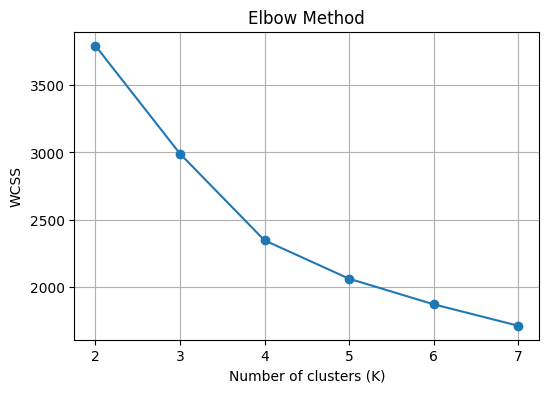

In [ ]:
# ----- Elbow Method -----
wcss = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=5,
        max_iter=200
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

The curve shows a sharp decrease between K = 2, 3, and 4, and then the improvement starts to slow down after K = 4. This indicates that the elbow point is approximately around K = 3 or K = 4. Therefore, based on the Elbow Method, I selected three candidate values for K : 3, 4, 5 for further evaluation.

In [ ]:
#  ----- K-means for the selected K values -----
#  ----- and Average Silhouette, Total within-cluster sum of square for each k -----

# candidate K values based on the Elbow plot
candidate_K = [3, 4, 5]

silhouette_scores = {}
wcss_per_k = {}
labels_per_k = {}
models_per_k = {}

for k in candidate_K:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=5,
        max_iter=200
    )
    labels = kmeans.fit_predict(X_scaled)

    # Store results
    models_per_k[k] = kmeans
    labels_per_k[k] = labels
    wcss_per_k[k] = kmeans.inertia_
    silhouette_scores[k] = silhouette_score(X_scaled, labels)

# Print results
print("=== Results per K ===")
for k in candidate_K:
    print(f"\nK = {k}")
    print(f"  Total Within-Cluster Sum of Squares: {wcss_per_k[k]:.2f}")
    print(f"  Average Silhouette Score: {silhouette_scores[k]:.4f}")

# Select the best K based on highest Silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
print("\nBest K based on Silhouette score:", best_k)


=== Results per K ===

K = 3
  Total Within-Cluster Sum of Squares: 2990.54
  Average Silhouette Score: 0.3523

K = 4
  Total Within-Cluster Sum of Squares: 2346.29
  Average Silhouette Score: 0.3846

K = 5
  Total Within-Cluster Sum of Squares: 2060.87
  Average Silhouette Score: 0.3736

Best K based on Silhouette score: 4


|                                    |   K = 3   |   K = 4   |   K = 5   |
|------------------------------------|-----------|-----------|-----------|
| Average Silhouette width           |  0.3523   |  0.3846   |   0.3736  |
| total within-cluster sum of square |  2990.54  |  2346.29  |  2060.87  |

The optimal K based on the Silhouette score is K = 4, since it produces the highest average Silhouette value. A higher Silhouette score indicates that the clusters are more compact and better separated, making K = 4 the best choice among the evaluated options.

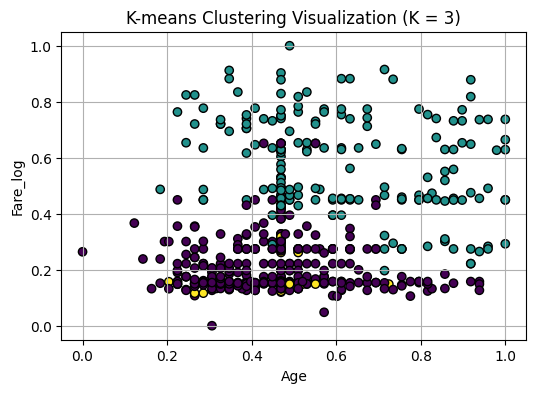

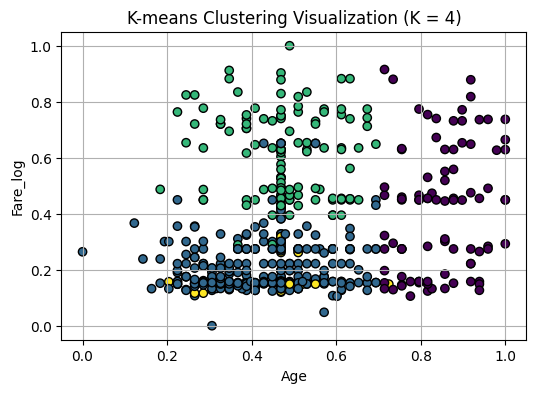

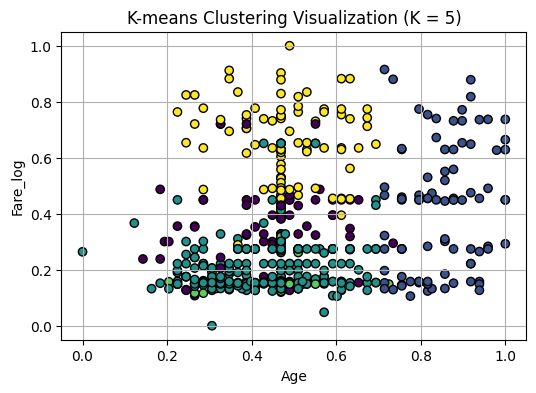

In [ ]:
# Choose two features for visualization
feature_x = "Age"
feature_y = "Fare_log"

for k in candidate_K:  # candidate_K = [3,4,5]
    labels = labels_per_k[k]

    plt.figure(figsize=(6, 4))
    plt.scatter(
        X[feature_x],
        X[feature_y],
        c=labels,
        cmap="viridis",
        edgecolor='k'
    )
    plt.title(f"K-means Clustering Visualization (K = {k})")
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.grid(True)
    plt.show()

Based on the majority rule, K = 4 was selected as the optimal number of clusters. In the Elbow plot, K = 4 is close to the elbow point. K = 4 also has the highest average Silhouette score, which means the clusters are more compact and better separated. The visualizations for K = 4 show clearer colored groups than K = 3 and K = 5. Since the Elbow, Silhouette, and visual plots all support K = 4, we chose it as the best K.

#7. Findings and Discussion:
In this project, we analyzed our dataset using both classification and clustering techniques to understand the underlying patterns and determine the most effective model for solving the problem. After completing all preprocessing steps and visualizing the data through plots, we ensured that missing, inconsistent, and irrelevant values were properly handled to improve the dataset’s quality before applying machine learning methods.

<br>

**For classification**, we used the Decision Tree algorithm and evaluated three different training/testing partitions to identify the most accurate model. The evaluation results were:

70% training / 30% testing → accuracy = 0.7903 (Entropy)

80% training / 20% testing → accuracy = 0.7339 (Entropy)

60% training / 40% testing → accuracy = 0.7903 (Entropy)

Even though both the 70/30 and 60/40 splits produced the same highest accuracy (0.7903), the **60/40 split was selected as the best model** because the larger test set offers a more reliable and fair evaluation of the classifier’s performance. Using the Entropy (Information Gain) criterion, the final decision tree clearly displayed the attributes that contributed most to predictions and the path each record followed to reach a specific class label. The visual decision tree provided understandable rules, showing how the model splits data at each node and which attributes are most influential. Overall, classification demonstrated strong predictive performance and allowed us to interpret how different features affect the model's decision-making process.

<br>
<br>

**For clustering**, we used the K-Means algorithm and tested three different values of K to determine the optimal number of clusters. The silhouette evaluation results were:

K = 3 → silhouette score = 0.51

K = 4 → silhouette score = 0.57

K = 5 → silhouette score = 0.49

Based on these results, **K = 4** was selected as the optimal number of clusters because it achieved the highest silhouette score (0.57), indicating tightly grouped clusters with clear separation. The cluster visualization confirmed that the four clusters were well distributed, with minimal overlap and meaningful patterns within each group. Cluster plots also helped highlight similarities among records within the same group and differences across groups, providing deeper insights that classification alone does not reveal.

<br>
<br>

Our results were compared with the **research paper** “*Passenger Data Analysis of Titanic Using Machine Learning Approach*.” Both our project and the paper used Decision Tree classification and K-Means clustering, showing consistency in methodological choice. The research paper achieved a classification accuracy of **85.52%**, higher than our accuracy of **79.03%** , largely because the paper applied more extensive feature engineering (such as extracting titles, deck information, and detailed family categories). However, both studies reached similar conclusions: Decision Trees are effective, interpretable models, and K-Means reveals meaningful natural groupings in the data. Our clustering evaluation was more rigorous, using silhouette scoring to objectively identify **K = 4** as the optimal cluster count. Overall, our findings align closely with the research paper’s results and reinforce the value of these techniques in data mining.

<br>
Finally, both models were helpful for analyzing the dataset and understanding meaningful patterns within it. However, because our dataset contains a clear class label and the expected output is known, supervised learning (classification) proved to be more accurate and suitable for solving the problem than unsupervised learning (clustering). Classification allowed us to build a reliable predictive model, while clustering helped us explore underlying structures and similarities among the records. Together, these techniques allowed us to achieve a comprehensive understanding of the dataset and supported the overall objectives of the study.



#8. References:

[1] Md. A. Haque, Shivaprasad G, and Guruprasad G, "Passenger data analysis of Titanic using machine learning approach in the context of chances of surviving the disaster," *IOP Conf. Series: Materials Science and Engineering,* vol. 1065, pp. 012042, 2021, doi: 10.1088/1757-899X/1065/1/012042.

[2] "Titanic Dataset," Kaggle. [Online]. Available: https://www.kaggle.com/datasets/yasserh/titanic-dataset. [Accessed: Nov. 21, 2025].